# Exploratory Data Analysis of components of pollution, country and year wise. 

In [32]:
import pandas as pd

Importing Dataset into dataframe

In [33]:
pollution_df = pd.read_excel(r"C:\Users\Tushar Khatri .LAPTOP-SLBNP4RE\Desktop\Data\who_pollution_data.xlsx", sheet_name = "data")

In [34]:
pollution_df.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN


In [35]:
#Dropping the unwanted columns from the dataset.
pollution_df.drop(pollution_df.columns[[0,1,3,8,9,10,11,12,13,14]], axis=1, inplace = True)

In [36]:
pollution_df.head()

,WHO Country Name,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
0,Afghanistan,2019,119.77,NaN,NaN
1,Albania,2015,NaN,17.65,26.63
2,Albania,2016,14.32,24.56,24.78
3,Albania,2015,NaN,NaN,23.96
4,Albania,2016,NaN,NaN,26.26


In [37]:
#Renaming columns for better understanding
pollution_df.rename(columns = {'WHO Country Name':'Country_Name', 'Measurement Year':'Year',
                              'PM2.5 (μg/m3)':'PM2.5', 'PM10 (μg/m3)':'PM10', 'NO2 (μg/m3)':'NO2'}, inplace = True)

In [38]:
pollution_df.head()

,Country_Name,Year,PM2.5,PM10,NO2
0,Afghanistan,2019,119.77,NaN,NaN
1,Albania,2015,NaN,17.65,26.63
2,Albania,2016,14.32,24.56,24.78
3,Albania,2015,NaN,NaN,23.96
4,Albania,2016,NaN,NaN,26.26


In [39]:
pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 5 columns):
Country_Name    32191 non-null object
Year            32191 non-null int64
PM2.5           15048 non-null float64
PM10            21109 non-null float64
NO2             22200 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.2+ MB


The above information shows that the data contains NaN values.

In [40]:
pollution_df.describe()

,Year,PM2.5,PM10,NO2
count,32191.000000,15048.000000,21109.000000,22200.000000
mean,2015.579354,22.920320,30.533252,20.619336
std,2.752654,17.925906,29.312756,12.133388
min,2000.000000,0.010000,1.040000,0.000000
25%,2014.000000,10.350000,16.980000,12.000000
50%,2016.000000,16.000000,22.000000,18.800000
75%,2018.000000,31.000000,31.300000,27.160000
max,2021.000000,191.900000,540.000000,210.680000


In [41]:
pollution_df['Country_Name'].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'United Arab Emirates',
       'Argentina', 'Australia', 'Austria', 'Belgium', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Bolivia (Plurinational State of)', 'Brazil', 'Bhutan', 'Canada',
       'Switzerland', 'Chile', 'China', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany', 'Denmark',
       'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'United Kingdom', 'Georgia', 'Ghana',
       'Greece', 'Guatemala', 'Honduras', 'Croatia', 'Hungary',
       'Indonesia', 'India', 'Ireland', 'Iran (Islamic Republic of)',
       'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Republic of Korea', 'Kuwait',
       "Lao People's Democratic Republic", 'Lebanon', 'Liechtenstein',
       'Sri Lanka', 'Lithuania', 'Luxembourg', 'Latvia', 'Morocco',
       'Monaco', 'Ma

In [42]:
pollution_average = pd.DataFrame()

Creating dataframe using previous dataframe for doing average calculations

In [44]:
pollution_df['Year'] = pollution_df['Year'].astype(str) #Converting datatype of year column to string 
pollution_df['CountryWithYear'] = pollution_df[['Country_Name', 'Year']].agg('-'.join, axis=1) #Creating new column using existing two columns

In [45]:
pollution_df.head()

,Country_Name,Year,PM2.5,PM10,NO2,CountryWithYear
0,Afghanistan,2019,119.77,NaN,NaN,Afghanistan-2019
1,Albania,2015,NaN,17.65,26.63,Albania-2015
2,Albania,2016,14.32,24.56,24.78,Albania-2016
3,Albania,2015,NaN,NaN,23.96,Albania-2015
4,Albania,2016,NaN,NaN,26.26,Albania-2016


In [46]:
pollution_df['PM2.5'] = pollution_df['PM2.5'].fillna(pollution_df.groupby('CountryWithYear')['PM2.5'].transform('mean'))

Filling up NaN values by mean of the corresponding CountryWithYear. The rows which still have NaN values indicate that all the values for corresponding CountryWithYear contains NaN.

In [47]:
pollution_df

,Country_Name,Year,PM2.5,PM10,NO2,CountryWithYear
0,Afghanistan,2019,119.770000,NaN,NaN,Afghanistan-2019
1,Albania,2015,21.790000,17.65,26.63,Albania-2015
2,Albania,2016,14.320000,24.56,24.78,Albania-2016
3,Albania,2015,21.790000,NaN,23.96,Albania-2015
4,Albania,2016,21.480000,NaN,26.26,Albania-2016
5,Albania,2017,NaN,NaN,24.70,Albania-2017
6,Albania,2015,30.340000,45.31,NaN,Albania-2015
7,Albania,2016,28.640000,40.21,12.52,Albania-2016
8,Albania,2014,NaN,15.25,NaN,Albania-2014
9,Albania,2015,21.790000,19.39,14.18,Albania-2015


In [48]:
len(pollution_df.CountryWithYear.unique())

718

In [49]:
result = pollution_df.groupby('CountryWithYear')['PM2.5'].mean()

In [50]:
type(result)

pandas.core.series.Series

Creating dataframe from series

In [51]:
PM25_df = result.to_frame(name="PM2.5 Average")

In [52]:
type(PM25_df)

pandas.core.frame.DataFrame

In [53]:
PM25_df = PM25_df.reset_index(level=0)

In [54]:
PM25_df.head()

,CountryWithYear,PM2.5 Average
0,Afghanistan-2019,119.77
1,Albania-2014,NaN
2,Albania-2015,21.79
3,Albania-2016,21.48
4,Albania-2017,NaN


In [55]:
PM25_df = PM25_df.dropna()

In [56]:
len(PM25_df)

574

In [57]:
PM25_df = PM25_df.rename(columns={'index': 'CountryWithYear'})

In [58]:
#reseting the index
PM25_df = PM25_df.reset_index(drop=True)

In [59]:
PM25_df.head()

,CountryWithYear,PM2.5 Average
0,Afghanistan-2019,119.77
1,Albania-2015,21.79
2,Albania-2016,21.48
3,Albania-2019,10.32
4,Algeria-2019,21.53


In [60]:
#Splitting the CountryWithYear column back into two parts which are country & year.
PM25_df[['Country','Year']] = PM25_df.CountryWithYear.str.split("-",expand=True)

In [61]:
PM25_df = PM25_df.drop('CountryWithYear', axis=1)
PM25_df.head()

,PM2.5 Average,Country,Year
0,119.77,Afghanistan,2019
1,21.79,Albania,2015
2,21.48,Albania,2016
3,10.32,Albania,2019
4,21.53,Algeria,2019


In [62]:
PM25_df = PM25_df[['Country', 'Year', 'PM2.5 Average']]
PM25_df.head()

,Country,Year,PM2.5 Average
0,Afghanistan,2019,119.77
1,Albania,2015,21.79
2,Albania,2016,21.48
3,Albania,2019,10.32
4,Algeria,2019,21.53


In [63]:
PM25_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 3 columns):
Country          574 non-null object
Year             574 non-null object
PM2.5 Average    574 non-null float64
dtypes: float64(1), object(2)
memory usage: 13.5+ KB


The steps done for PM2.5 will be repeated for PM10 particles and NO2.

In [64]:
result = pollution_df.groupby('CountryWithYear')['PM10'].mean()
PM10_df = result.to_frame(name="PM10 Average")
PM10_df = PM10_df.reset_index(level=0)
PM10_df = PM10_df.dropna()
PM10_df = PM10_df.rename(columns={'index': 'CountryWithYear'})
PM10_df = PM10_df.reset_index(drop=True)
PM10_df[['Country','Year']] = PM10_df.CountryWithYear.str.split("-",expand=True)
PM10_df = PM10_df.drop('CountryWithYear', axis=1)
PM10_df = PM10_df[['Country', 'Year', 'PM10 Average']]
PM10_df.head()

,Country,Year,PM10 Average
0,Albania,2014,15.2500
1,Albania,2015,25.4675
2,Albania,2016,29.1600
3,Andorra,2012,27.5000
4,Andorra,2014,25.0300


In [65]:
PM10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 3 columns):
Country         620 non-null object
Year            620 non-null object
PM10 Average    620 non-null float64
dtypes: float64(1), object(2)
memory usage: 14.6+ KB


In [66]:
result = pollution_df.groupby('CountryWithYear')['NO2'].mean()
NO2_df = result.to_frame(name="NO2 Average")
NO2_df = NO2_df.reset_index(level=0)
NO2_df = NO2_df.dropna()
NO2_df = NO2_df.rename(columns={'index': 'CountryWithYear'})
NO2_df = NO2_df.reset_index(drop=True)
NO2_df[['Country','Year']] = NO2_df.CountryWithYear.str.split("-",expand=True)
NO2_df = NO2_df.drop('CountryWithYear', axis=1)
NO2_df = NO2_df[['Country', 'Year', 'NO2 Average']]
NO2_df.head()

,Country,Year,NO2 Average
0,Albania,2015,18.585000
1,Albania,2016,21.186667
2,Albania,2017,24.700000
3,Andorra,2012,31.640000
4,Andorra,2014,27.620000


In [67]:
NO2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 3 columns):
Country        507 non-null object
Year           507 non-null object
NO2 Average    507 non-null float64
dtypes: float64(1), object(2)
memory usage: 12.0+ KB


# Exploratory Data Analysis of sales of EV vehicles across the globe. 

Importing EV data from CSV file into dataframe.

In [70]:
EV_df = pd.read_csv(r"C:\Users\Tushar Khatri .LAPTOP-SLBNP4RE\Desktop\Data\EV_data.csv")

In [71]:
EV_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.00000
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.00000
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
4,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000


Creating dataframe from the above dataframe containing the total sales of EV vehicles in a region during a particular year.

In [75]:
EV_Sales_YearWise = EV_df.groupby(["region","year"]).value.sum().reset_index()

In [76]:
EV_Sales_YearWise.head()

,region,year,value
0,Australia,2011,98.00696
1,Australia,2012,550.03280
2,Australia,2013,880.03940
3,Australia,2014,3200.17700
4,Australia,2015,5360.23200


In [124]:
#importing pyplot and seaborn for data visualization.
from matplotlib import pyplot as plt
import seaborn as sns

Plotting the bar graph NO2, PM2.5, PM10 & EV Sales of United States of America, United Kingdom & Australia to study whether the increase in sales of EV has reduced the amount of pollutants in the air or not.
Similarly, the plots for other countries can be plotted to understand impact of EV sales on the concentration of NO2, PM2.5 and PM10.

C:\Users\Tushar Khatri .LAPTOP-SLBNP4RE\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


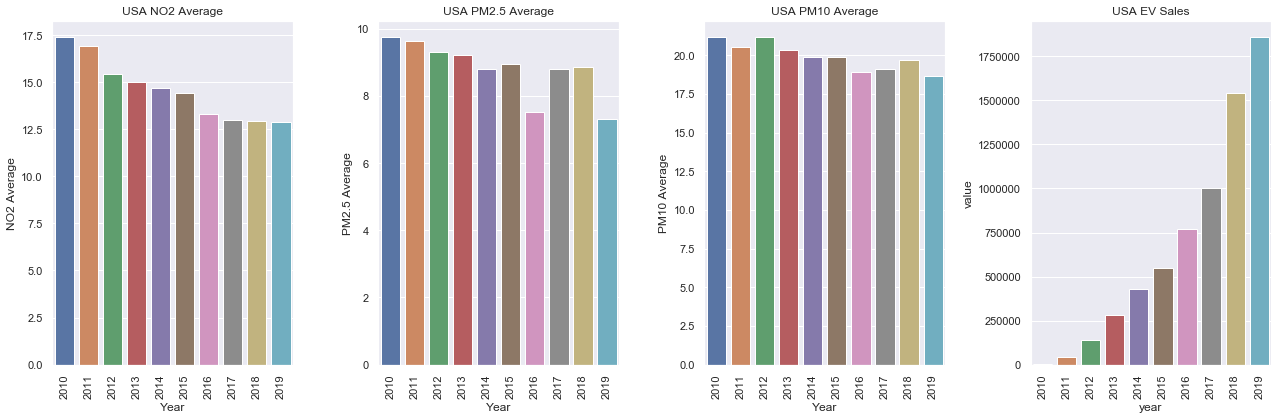

In [120]:
plt.figure(figsize=(18,6)) #to adjust the size of plot where graphs will be plotted.
plt.subplot(1, 4, 1) #Plotting a plot in 1st column of the row.
sns.barplot(x = "Year", y = "NO2 Average", data = NO2_df.loc[NO2_df['Country']=='United States of America']).set(title = "USA NO2 Average")
plt.xticks(rotation=90)#
plt.subplot(1, 4, 2)#Plotting a plot in 2st column of the row.
plt.xticks(rotation=90)
sns.barplot(x = "Year", y = "PM2.5 Average", data = PM25_df.loc[PM25_df['Country']=='United States of America']).set(title = "USA PM2.5 Average")
plt.subplot(1, 4, 3)
plt.xticks(rotation=90)
sns.barplot(x = "Year", y = "PM10 Average", data = PM10_df.loc[PM10_df['Country']=='United States of America']).set(title = "USA PM10 Average")
plt.subplot(1, 4, 4)
plt.xticks(rotation=90)
sns.barplot(x = "year", y = "value", data = EV_Sales_YearWise.loc[(EV_Sales_YearWise['region']=='USA')  & (EV_Sales_YearWise['year']<2020) ] ).set(title = "USA EV Sales")
plt.xticks(rotation=90)
plt.show()

The above reading for USA shows that their is a decrease in the average of NO2, PM2.5 and in case of PM10, there is a stagnancy with the increase in sales of EV.

C:\Users\Tushar Khatri .LAPTOP-SLBNP4RE\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


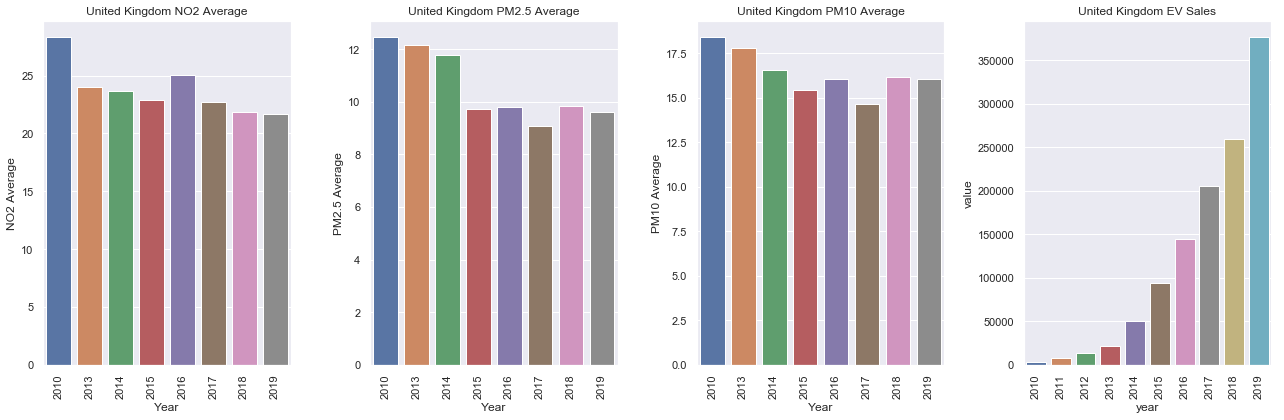

In [122]:
plt.figure(figsize=(18,6))
plt.subplot(1, 4, 1)
sns.barplot(x = "Year", y = "NO2 Average", data = NO2_df.loc[NO2_df['Country']=='United Kingdom']).set(title = "United Kingdom NO2 Average")
plt.xticks(rotation=90)
plt.subplot(1, 4, 2)
plt.xticks(rotation=90)
sns.barplot(x = "Year", y = "PM2.5 Average", data = PM25_df.loc[PM25_df['Country']=='United Kingdom']).set(title = "United Kingdom PM2.5 Average")
plt.subplot(1, 4, 3)
plt.xticks(rotation=90)
sns.barplot(x = "Year", y = "PM10 Average", data = PM10_df.loc[PM10_df['Country']=='United Kingdom']).set(title = "United Kingdom PM10 Average")
plt.subplot(1, 4, 4)
plt.xticks(rotation=90)
sns.barplot(x = "year", y = "value", data = EV_Sales_YearWise.loc[(EV_Sales_YearWise['region']=='United Kingdom')  & (EV_Sales_YearWise['year']<2020) ] ).set(title = "United Kingdom EV Sales")
plt.xticks(rotation=90)
plt.show()

In case of United Kingdom, there is a slight decrease in the concentration of NO2, PM2.5 and PM10 with the increase in the sales of EV.  

C:\Users\Tushar Khatri .LAPTOP-SLBNP4RE\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


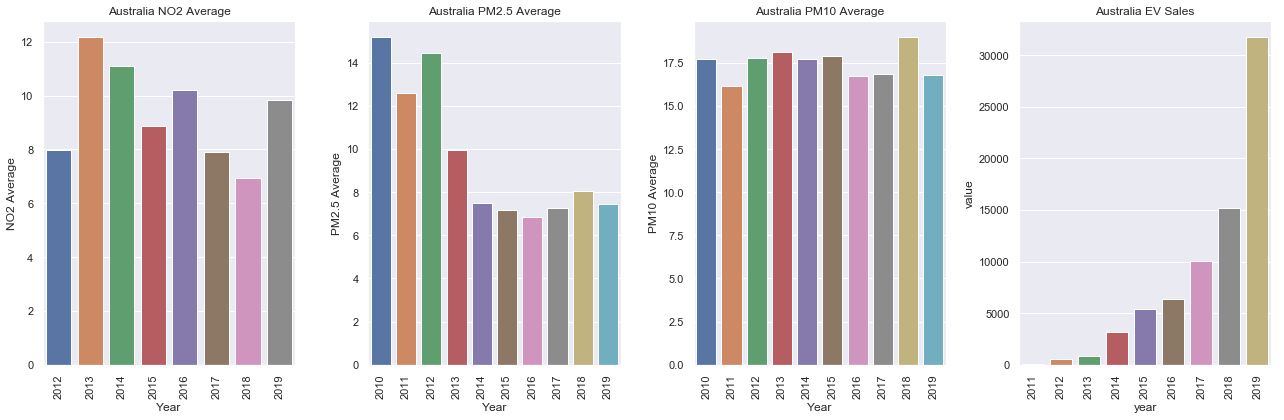

In [123]:
plt.figure(figsize=(18,6))
plt.subplot(1, 4, 1)
sns.barplot(x = "Year", y = "NO2 Average", data = NO2_df.loc[NO2_df['Country']=='Australia']).set(title = "Australia NO2 Average")
plt.xticks(rotation=90)
plt.subplot(1, 4, 2)
plt.xticks(rotation=90)
sns.barplot(x = "Year", y = "PM2.5 Average", data = PM25_df.loc[PM25_df['Country']=='Australia']).set(title = "Australia PM2.5 Average")
plt.subplot(1, 4, 3)
plt.xticks(rotation=90)
sns.barplot(x = "Year", y = "PM10 Average", data = PM10_df.loc[PM10_df['Country']=='Australia']).set(title = "Australia PM10 Average")
plt.subplot(1, 4, 4)
plt.xticks(rotation=90)
sns.barplot(x = "year", y = "value", data = EV_Sales_YearWise.loc[(EV_Sales_YearWise['region']=='Australia')  & (EV_Sales_YearWise['year']<2020) ] ).set(title = "Australia EV Sales")
plt.xticks(rotation=90)
plt.show()

For Australia, the NO2 average over the years is uncertain. For PM2.5 concentrations, there is a strong dip in 2014, post which the change is not much to observe. The average PM10 for Australia is almost same during these years. 